<a href="https://colab.research.google.com/github/Priyanshi-Goel/IEEE-bootcamp/blob/main/Spotify_Priyanshi_CSAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

explore


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Priyanshi_Goel_2024UCA1873/DATASET/tracks.csv')
print("First few rows of the dataset:")
print(df.head())
print("\nDataset Information:")
print(df.info())
print("\nMissing values in each column:")
print(df.isnull().sum())


First few rows of the dataset:
                       id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   

   duration_ms  explicit              artists                  id_artists  \
0       126903         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1        98200         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   
2       181640         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
3       176907         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
4       163080         0      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   

  release_date  danceability  energy 

remove duplicates


In [ ]:
df = df.dropna()
numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_df = df[numeric_columns]

exploratory

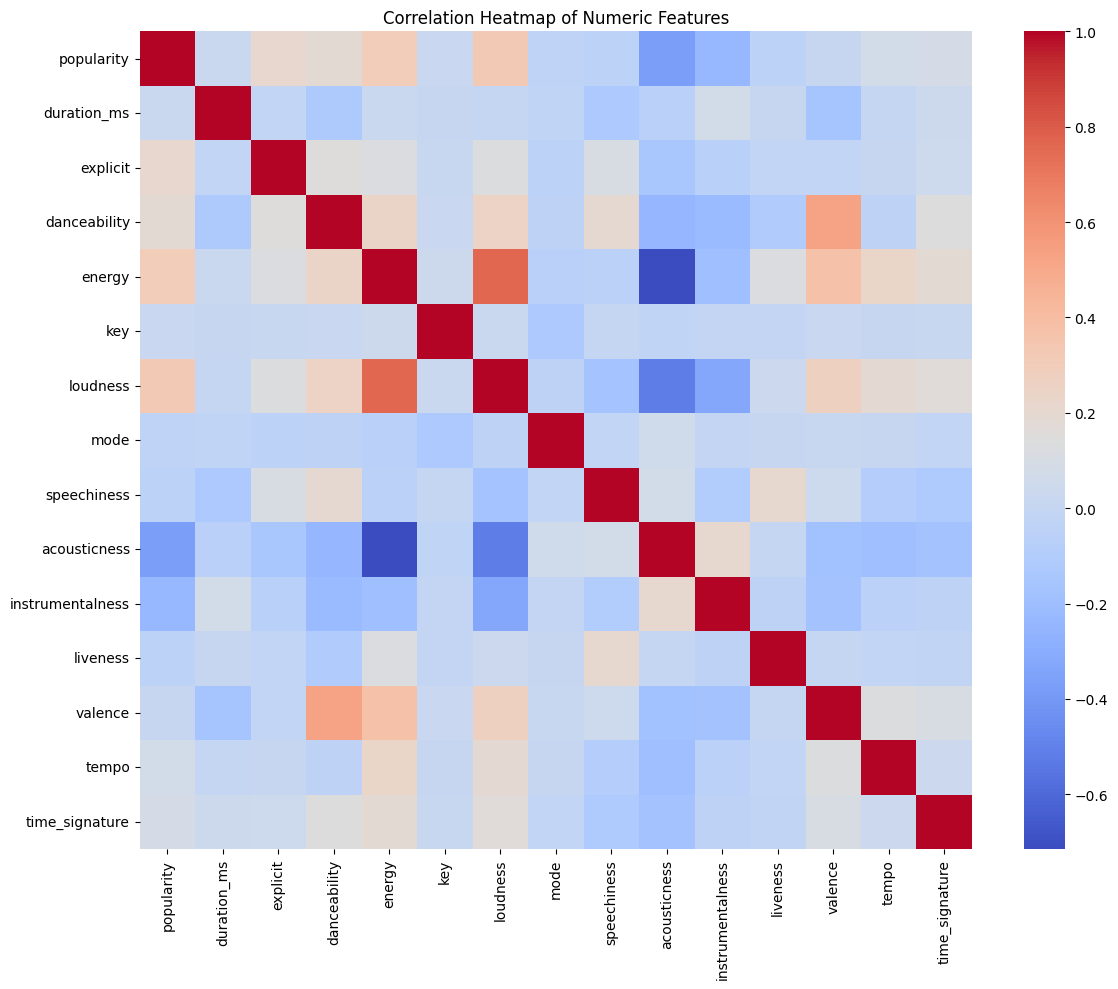

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

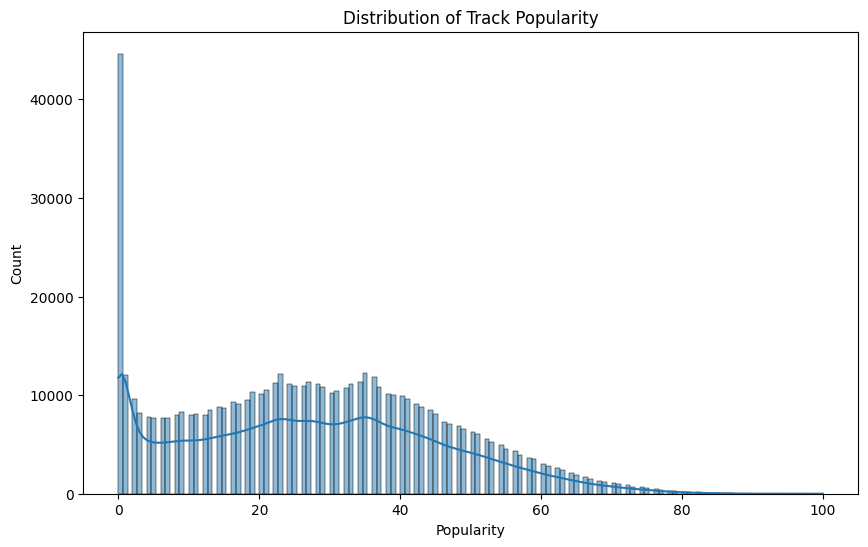

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.show()

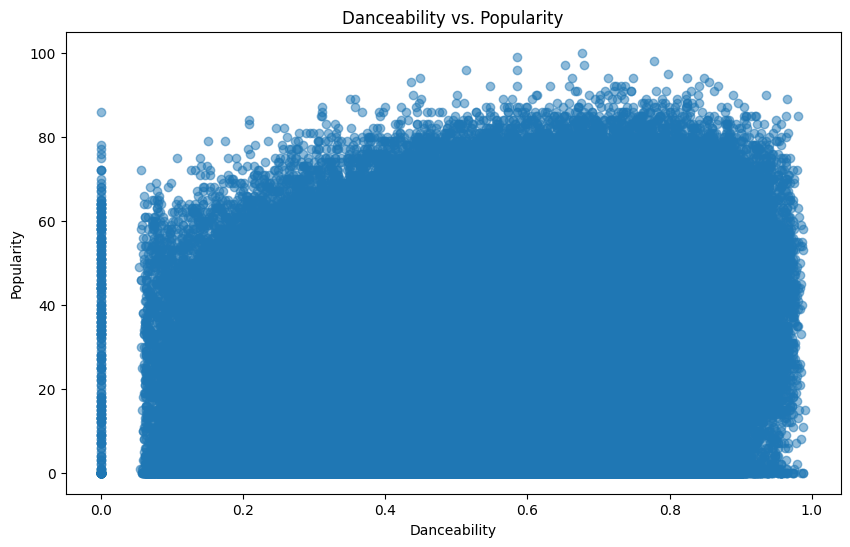

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['danceability'], df['popularity'], alpha=0.5)
plt.title('Danceability vs. Popularity')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


create and train model


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

evaluation


In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("\nModel Evaluation Metrics:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")


Model Evaluation Metrics:
Mean Squared Error: 264.60
Root Mean Squared Error: 16.27
R-squared Score: 0.21


results


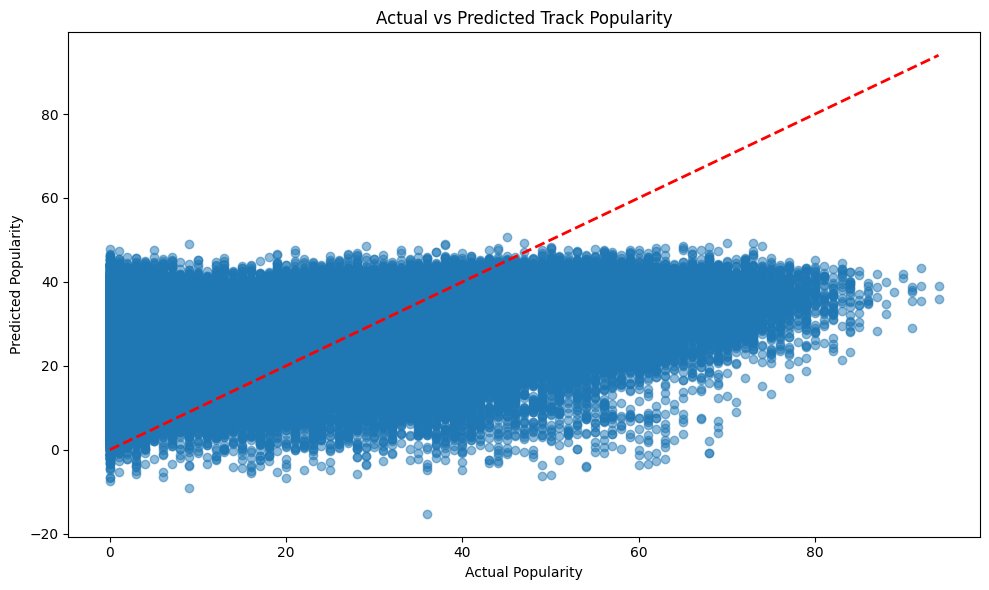

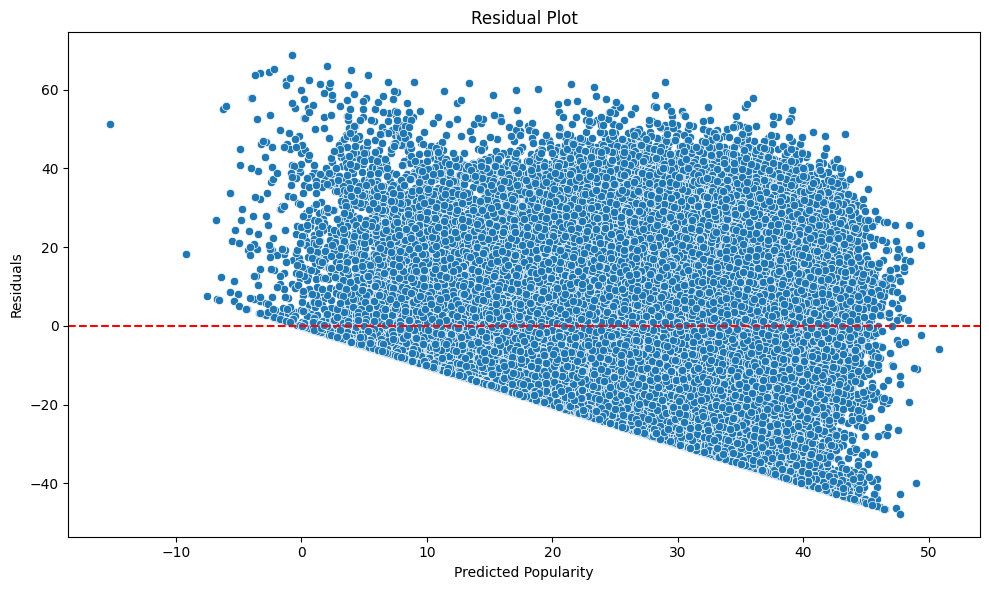

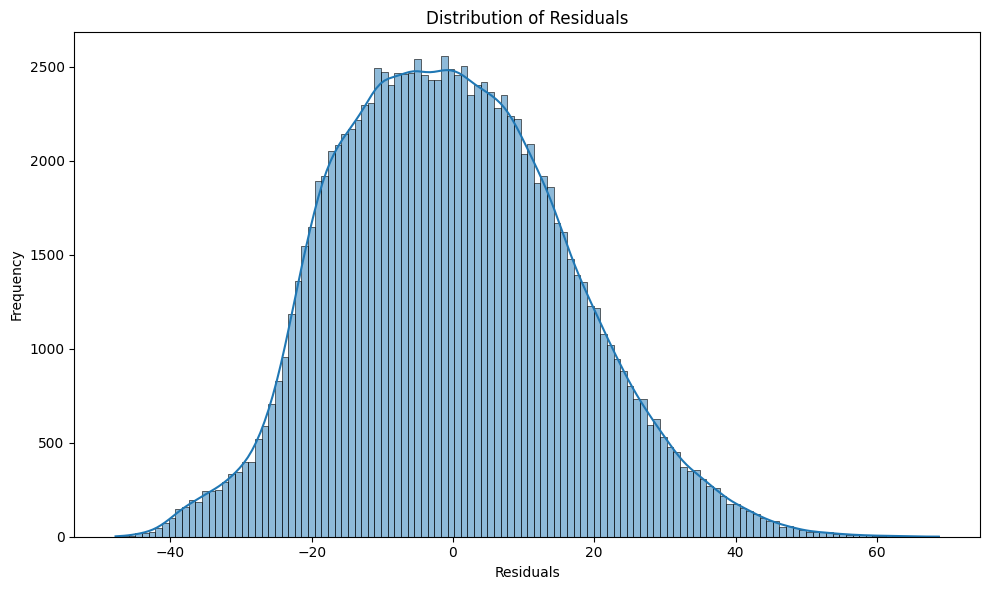

In [ ]:


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs Predicted Track Popularity')
plt.tight_layout()
plt.show()


residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Popularity')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.tight_layout()
plt.show()


